In [1]:
import os
import pandas as pd
import numpy as np

SRC_DIR = os.path.abspath(".")         # endereço do script
BASE_DIR = os.path.dirname(SRC_DIR)
DATA_DIR = os.path.join(BASE_DIR, "data")
IMGS_DIR = os.path.join(BASE_DIR, "images")

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution= 300):
    path=os.path.join(IMGS_DIR, fig_id + "." + fig_extension)
    print("Salving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.save_fig(path, format=fig_extension, dpi=resolution)



In [2]:
train_data = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

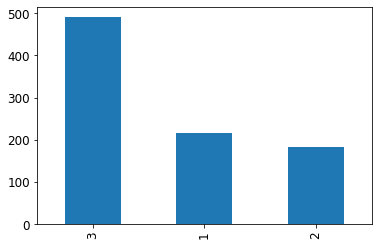

In [5]:
train_data['Pclass'].value_counts().plot(kind='bar')

In [6]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
train_data.shape

(891, 12)

In [8]:
train_data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
#! vamos dropar algumas features que não serão usadas para gerar o modelo
train_data = train_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
train_data.shape

(891, 8)

In [10]:
#! Filling the missing age values by the median value
train_data['Age'] = train_data.groupby('Sex', as_index=False)['Age'].apply(lambda g: g.fillna(g.median())).reset_index(drop=True)
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [11]:
train_data['Pclass']=train_data['Pclass'].astype('category')

In [12]:
train_data_new=pd.get_dummies(train_data)
train_data_new.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,38.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,26.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,35.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,27.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,14.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [13]:
X = train_data_new.drop('Survived', axis = 1)
y = train_data_new['Survived']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 12) (712,)
(179, 12) (179,)


In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_model =  DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [16]:
y_pred=tree_model.predict(X_test)
pred_results = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
pred_results.head()

,y_test,y_pred
172,1,1
524,0,0
452,0,0
170,0,1
620,0,0


In [17]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,86,15
1,28,50


In [18]:
tree_model.score(X_test, y_test)

0.7597765363128491

In [19]:
from sklearn.metrics import(accuracy_score,
                            precision_score,
                            recall_score,
                            confusion_matrix)

acc = accuracy_score(y_test, y_pred)
print(acc)
prec = precision_score(y_test, y_pred)
print(prec)
recall = recall_score(y_test, y_pred)
print(recall)

0.7597765363128491
0.6410256410256411
0.7692307692307693


In [20]:
tree_model

DecisionTreeClassifier(random_state=123)

In [21]:
# Lets use de AUC(Area Under Curve) as new evaluation metric.
# Our target value is a binary

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [22]:
roc_auc

0.761808367071525

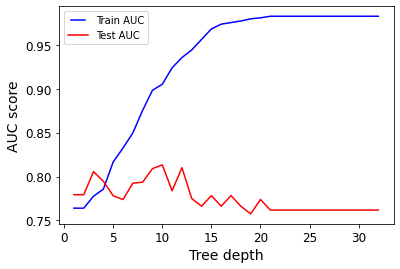

In [23]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth, random_state=123)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,"b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [24]:
from sklearn import tree
previsores= train_data.columns.tolist()
previsores

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']